# Gambler's Ruin Problem

## Introduction

The **Gambler's Ruin** problem is a classic problem in probability theory that models a gambler who starts with an initial fortune and repeatedly plays a game with fixed probability of winning each round. The gambler either wins or loses one unit per round and continues until reaching a target fortune (success) or going bankrupt (ruin).

## Mathematical Formulation

### Problem Setup

Consider a gambler with initial capital $i$ who plays against an adversary. The game continues until the gambler's fortune reaches either $0$ (ruin) or $N$ (target). At each round:
- The gambler wins with probability $p$
- The gambler loses with probability $q = 1 - p$

### Probability of Ruin

Let $P_i$ denote the probability of reaching fortune $N$ starting from fortune $i$. By conditioning on the first step, we obtain the difference equation:

$$P_i = p \cdot P_{i+1} + q \cdot P_{i-1}$$

with boundary conditions:
- $P_0 = 0$ (ruin state)
- $P_N = 1$ (success state)

### Analytical Solution

**Case 1: Biased game ($p \neq q$)**

The solution is:

$$P_i = \frac{1 - (q/p)^i}{1 - (q/p)^N}$$

**Case 2: Fair game ($p = q = 1/2$)**

The solution simplifies to:

$$P_i = \frac{i}{N}$$

### Expected Duration

Let $D_i$ denote the expected number of games until absorption (reaching 0 or N) starting from state $i$. The recurrence relation is:

$$D_i = 1 + p \cdot D_{i+1} + q \cdot D_{i-1}$$

with $D_0 = D_N = 0$.

**For $p \neq q$:**

$$D_i = \frac{i}{q-p} - \frac{N}{q-p} \cdot \frac{1-(q/p)^i}{1-(q/p)^N}$$

**For $p = q = 1/2$:**

$$D_i = i(N - i)$$

## Implementation

We will implement both Monte Carlo simulations and analytical solutions to verify the theoretical results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

### Analytical Solutions

In [2]:
def prob_success_analytical(i, N, p):
    """
    Calculate the probability of reaching N before 0, starting from i.
    
    Parameters:
    -----------
    i : int
        Initial fortune
    N : int
        Target fortune
    p : float
        Probability of winning each round
    
    Returns:
    --------
    float
        Probability of success
    """
    if i == 0:
        return 0.0
    if i == N:
        return 1.0
    
    q = 1 - p
    
    if abs(p - 0.5) < 1e-10:  # Fair game
        return i / N
    else:  # Biased game
        ratio = q / p
        return (1 - ratio**i) / (1 - ratio**N)


def expected_duration_analytical(i, N, p):
    """
    Calculate the expected number of games until absorption.
    
    Parameters:
    -----------
    i : int
        Initial fortune
    N : int
        Target fortune
    p : float
        Probability of winning each round
    
    Returns:
    --------
    float
        Expected duration
    """
    if i == 0 or i == N:
        return 0.0
    
    q = 1 - p
    
    if abs(p - 0.5) < 1e-10:  # Fair game
        return i * (N - i)
    else:  # Biased game
        ratio = q / p
        prob_success = (1 - ratio**i) / (1 - ratio**N)
        return (i - N * prob_success) / (q - p)

### Monte Carlo Simulation

In [3]:
def simulate_gamblers_ruin(i, N, p, n_simulations=10000):
    """
    Simulate the Gambler's Ruin problem using Monte Carlo method.
    
    Parameters:
    -----------
    i : int
        Initial fortune
    N : int
        Target fortune
    p : float
        Probability of winning each round
    n_simulations : int
        Number of Monte Carlo simulations
    
    Returns:
    --------
    tuple
        (probability of success, mean duration, std of duration)
    """
    successes = 0
    durations = []
    
    for _ in range(n_simulations):
        fortune = i
        steps = 0
        
        while 0 < fortune < N:
            if np.random.random() < p:
                fortune += 1
            else:
                fortune -= 1
            steps += 1
        
        durations.append(steps)
        if fortune == N:
            successes += 1
    
    prob_success = successes / n_simulations
    mean_duration = np.mean(durations)
    std_duration = np.std(durations)
    
    return prob_success, mean_duration, std_duration


def simulate_single_trajectory(i, N, p, max_steps=10000):
    """
    Simulate a single trajectory for visualization.
    
    Returns:
    --------
    list
        Fortune at each step
    """
    trajectory = [i]
    fortune = i
    
    while 0 < fortune < N and len(trajectory) < max_steps:
        if np.random.random() < p:
            fortune += 1
        else:
            fortune -= 1
        trajectory.append(fortune)
    
    return trajectory

## Results and Visualization

### 1. Comparison of Analytical and Simulated Results

In [4]:
# Parameters
N = 20  # Target fortune
n_simulations = 10000

# Test different probabilities
probabilities = [0.4, 0.5, 0.6]
initial_fortunes = range(1, N)

print("Comparison of Analytical vs Simulated Probabilities of Success")
print("=" * 65)

for p in probabilities:
    print(f"\np = {p}:")
    print(f"{'Initial':>8} {'Analytical':>12} {'Simulated':>12} {'Difference':>12}")
    print("-" * 48)
    
    for i in [5, 10, 15]:
        analytical = prob_success_analytical(i, N, p)
        simulated, _, _ = simulate_gamblers_ruin(i, N, p, n_simulations)
        diff = abs(analytical - simulated)
        print(f"{i:>8} {analytical:>12.4f} {simulated:>12.4f} {diff:>12.4f}")

Comparison of Analytical vs Simulated Probabilities of Success

p = 0.4:
 Initial   Analytical    Simulated   Difference
------------------------------------------------
       5       0.0020       0.0020       0.0000
      10       0.0170       0.0167       0.0003


      15       0.1314       0.1352       0.0038

p = 0.5:
 Initial   Analytical    Simulated   Difference
------------------------------------------------


       5       0.2500       0.2533       0.0033


      10       0.5000       0.4936       0.0064


      15       0.7500       0.7532       0.0032

p = 0.6:
 Initial   Analytical    Simulated   Difference
------------------------------------------------
       5       0.8686       0.8709       0.0023


      10       0.9830       0.9831       0.0001
      15       0.9980       0.9982       0.0002


### 2. Comprehensive Visualization

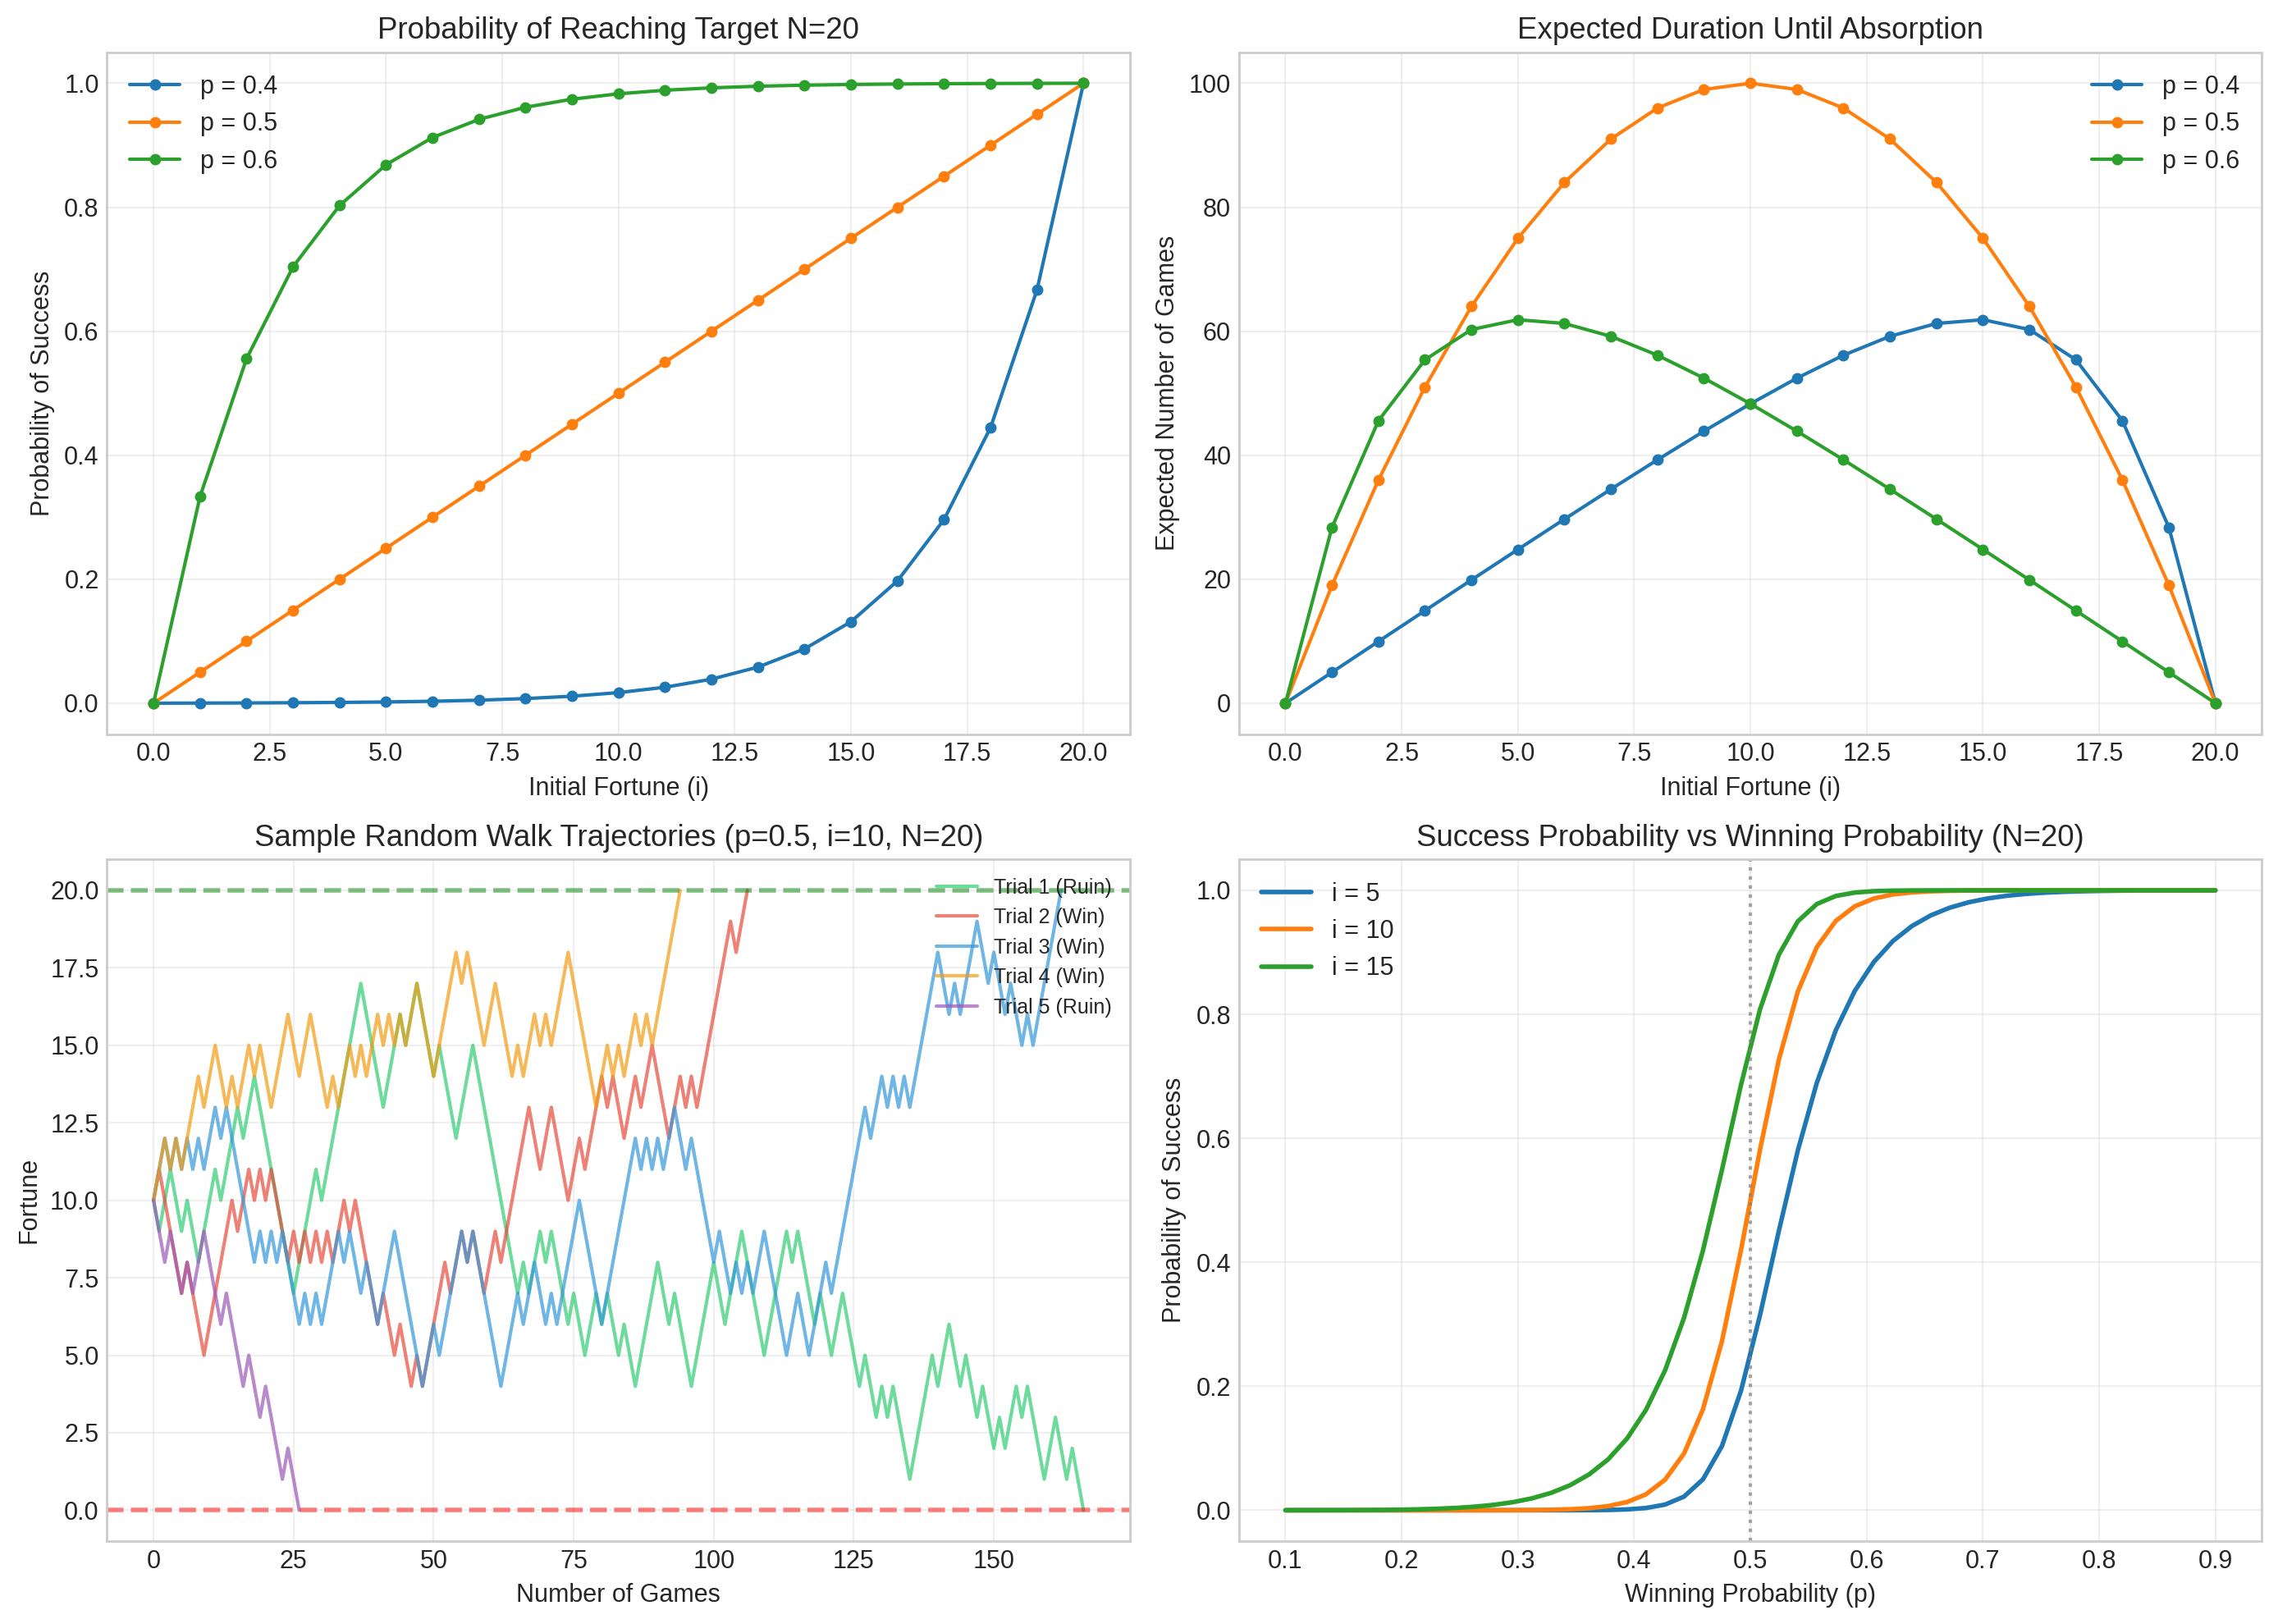


Plot saved to 'plot.png'


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Probability of Success vs Initial Fortune
ax1 = axes[0, 0]
N = 20
initial_range = np.arange(0, N+1)

for p in [0.4, 0.5, 0.6]:
    probs = [prob_success_analytical(i, N, p) for i in initial_range]
    ax1.plot(initial_range, probs, 'o-', label=f'p = {p}', markersize=4)

ax1.set_xlabel('Initial Fortune (i)')
ax1.set_ylabel('Probability of Success')
ax1.set_title('Probability of Reaching Target N=20')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Expected Duration vs Initial Fortune
ax2 = axes[0, 1]

for p in [0.4, 0.5, 0.6]:
    durations = [expected_duration_analytical(i, N, p) for i in initial_range]
    ax2.plot(initial_range, durations, 'o-', label=f'p = {p}', markersize=4)

ax2.set_xlabel('Initial Fortune (i)')
ax2.set_ylabel('Expected Number of Games')
ax2.set_title('Expected Duration Until Absorption')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Sample Trajectories
ax3 = axes[1, 0]
np.random.seed(123)

colors = ['#2ecc71', '#e74c3c', '#3498db', '#f39c12', '#9b59b6']
for idx in range(5):
    traj = simulate_single_trajectory(10, 20, 0.5)
    outcome = 'Win' if traj[-1] == 20 else 'Ruin'
    ax3.plot(traj, color=colors[idx], alpha=0.7, 
             label=f'Trial {idx+1} ({outcome})', linewidth=1.5)

ax3.axhline(y=0, color='red', linestyle='--', linewidth=2, alpha=0.5)
ax3.axhline(y=20, color='green', linestyle='--', linewidth=2, alpha=0.5)
ax3.set_xlabel('Number of Games')
ax3.set_ylabel('Fortune')
ax3.set_title('Sample Random Walk Trajectories (p=0.5, i=10, N=20)')
ax3.legend(loc='upper right', fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Effect of Winning Probability on Success Rate
ax4 = axes[1, 1]
p_range = np.linspace(0.1, 0.9, 50)
initial_values = [5, 10, 15]
N = 20

for i in initial_values:
    success_probs = [prob_success_analytical(i, N, p) for p in p_range]
    ax4.plot(p_range, success_probs, label=f'i = {i}', linewidth=2)

ax4.axvline(x=0.5, color='gray', linestyle=':', alpha=0.7)
ax4.set_xlabel('Winning Probability (p)')
ax4.set_ylabel('Probability of Success')
ax4.set_title(f'Success Probability vs Winning Probability (N={N})')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gamblers_ruin_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Key Insights

### 1. Effect of Bias
Even a small disadvantage ($p < 0.5$) dramatically decreases the probability of success. For example, with $p = 0.4$ and starting from $i = 10$ with target $N = 20$, the success probability is significantly lower than the naive estimate.

### 2. Fair Game Linearity
In a fair game ($p = 0.5$), the probability of success is simply $i/N$, which is linear in the initial fortune. This is a direct consequence of the martingale property of the random walk.

### 3. Duration Characteristics
- For a fair game, the expected duration follows a parabolic curve $D_i = i(N-i)$, maximized at $i = N/2$
- Biased games tend to have shorter expected durations as the process drifts toward one of the absorbing states

### 4. Practical Implications
The Gambler's Ruin problem demonstrates why casino games with even slight house edges are profitable in the long run—the gambler will eventually be ruined with probability 1 if they play indefinitely against an adversary with unlimited resources.

## Conclusion

This notebook has demonstrated the Gambler's Ruin problem through both analytical solutions and Monte Carlo simulations. The close agreement between theoretical predictions and simulated results validates our implementation and provides intuition for the behavior of random walks with absorbing barriers. The problem serves as a foundational model in probability theory with applications ranging from population genetics to financial risk management.